In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import warnings
from mpl_toolkits.mplot3d import Axes3D


In [2]:
def plot_function_with_path(f, history, xmin, xmax, title):
    xs = np.linspace(xmin, xmax, 400)
    ys = f(xs)
    plt.figure()
    plt.plot(xs, ys, label="f(x)")
    x_path = [row["x"] for row in history]
    y_path = [f(x) for x in x_path]
    plt.plot(x_path, y_path, marker="o", linestyle="-", label="GD path")
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.show()

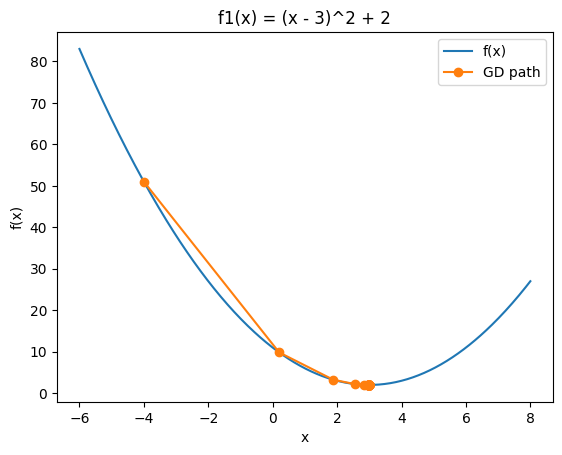

In [3]:
# 1) f1(x) = (x - 3)^2 + 2  (convex, unique minimum at x*=3)





def f1(x): 
    return (x - 3)**2 + 2

def df1(x): 
    return 2*(x - 3)

def gradient_descent(f,df,x0,alpha=0.1,max_iter=50):
    x=x0
    history=[]
    for n in range(max_iter):
        g=df(x)
        fx=f(x)
        history.append({"iter":n,"x":x,"f(x)":fx,"grad":g})
        x=x-alpha*g
    return history

x0=-4.0
alpha=0.30
xmin=-6
xmax=8
hist = gradient_descent(f1, df1, x0, alpha=alpha, max_iter=80)
plot_function_with_path(f1,hist,xmin,xmax,"f1(x) = (x - 3)^2 + 2")


In [13]:
# 2) f2(x) = x^4 - 3x^3 + 2  (non-convex; multiple stationary points)



def f2(x):
    return x**4.0 - 3.0*x**3.0 + 2.0

def df2(x):
    return 4.0*x**3.0 - 9.0*x**2.0


In [20]:
def gradient_descent(f,df,x0,alpha=0.1,max_iter=50):
    x=x0
    history=[]
    for n in range(max_iter):
        
        g=df(x)
        #fx=f(x)
        print(g)
        fx=0
        history.append({"iter":n,"x":x,"f(x)":fx,"grad":g})
        x=x-alpha*g
    return history

In [21]:
x0=-2.0
alpha=0.2
xmin=-3
xmax=4
hist = gradient_descent(f2, df2, x0, alpha=alpha, max_iter=80)
plot_function_with_path(f2,hist,xmin,xmax,"f2(x) = x^4 - 3x^3 + 2")

-68.0
5032.544000000003
-3948124707.630062
1.9693409958064241e+27
-2.4440649530312426e+80
4.671842667136287e+239


OverflowError: (34, 'Result too large')

In [23]:
# 3) f3(x) = (x + 1)^2 + sin(3x)  (convex term + oscillation; many local minima)






def f3(x):
    return (x + 1)**2 + np.sin(3*x)

def df3(x):
    return 2*(x + 1) + 3*np.cos(3*x)

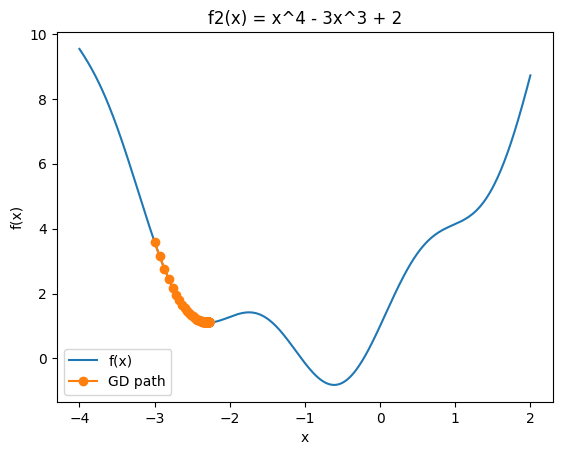

In [27]:
x0=-3.0
alpha=0.01
xmin=-4
xmax=2
hist = gradient_descent(f3, df3, x0, alpha=alpha, max_iter=80)
plot_function_with_path(f3,hist,xmin,xmax,"f2(x) = x^4 - 3x^3 + 2")

In [34]:
# f(x1, x2) = (x1 - 2)^2 + 3*(x2 + 1)^2 + 0.3*sin(3*x1)*cos(2*x2)
def f(x):
    x1, x2 = x
    return (x1 - 2)**2 + 3*(x2 + 1)**2 + 0.3*np.sin(3*x1)*np.cos(2*x2)

def grad_f(x):
    x1, x2 = x
    df_dx1 = 2*(x1 - 2) + 0.3*3*np.cos(3*x1)*np.cos(2*x2)
    df_dx2 = 6*(x2 + 1) - 0.3*2*np.sin(3*x1)*np.sin(2*x2)
    return np.array([df_dx1, df_dx2], dtype=float)

In [35]:
x0= np.array([-3.0, 3.0])
alpha = 0.15
hist = gradient_descent(f, grad_f, x0, alpha=alpha, max_iter=80)



[[1 2 3]
 [1 2 3]
 [1 2 3]]
[[4 4 4]
 [5 5 5]
 [6 6 6]]


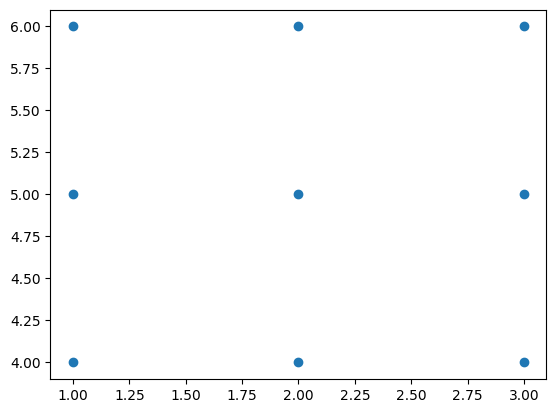

In [24]:
a=np.array([1,2,3])
b=np.array([4,5,6])

x1,x2=np.meshgrid(a,b)
print(x1)
print(x2)
plt.scatter(x1,x2)

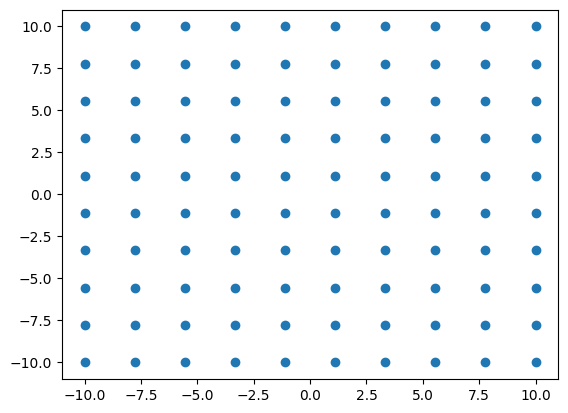

In [117]:

x1 = np.linspace(-10.0, 10.0, 10)
x2 = np.linspace(-10.0, 10.0, 10)
X1, X2 = np.meshgrid(x1, x2)
plt.scatter(X1,X2)

plt.show()

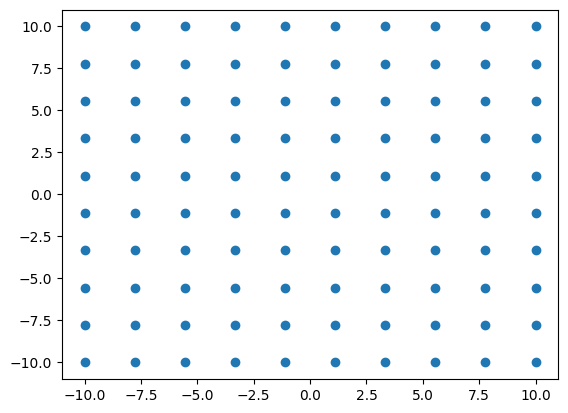

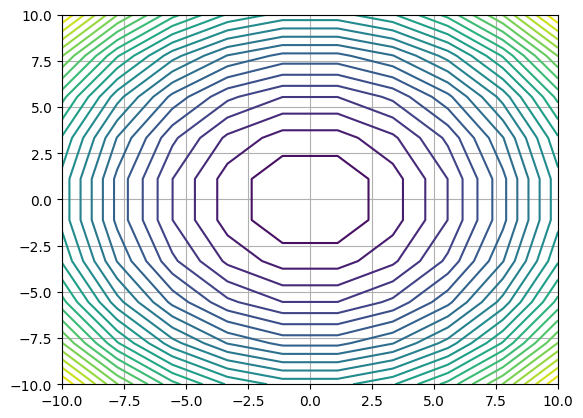

In [118]:

x1 = np.linspace(-10.0, 10.0, 10)
x2 = np.linspace(-10.0, 10.0, 10)

X1, X2 = np.meshgrid(x1, x2)

Z=X1**2+X2**2
plt.scatter(X1,X2)
plt.show()
cp = plt.contour(X1, X2, Z,levels=30)
plt.grid()
plt.show()


In [25]:
def f(x):
    return 3+4*x

def mse_loss(w0, w1, X, y):
    y_pred = w0 + w1 * X
    return np.mean((y - y_pred) ** 2)

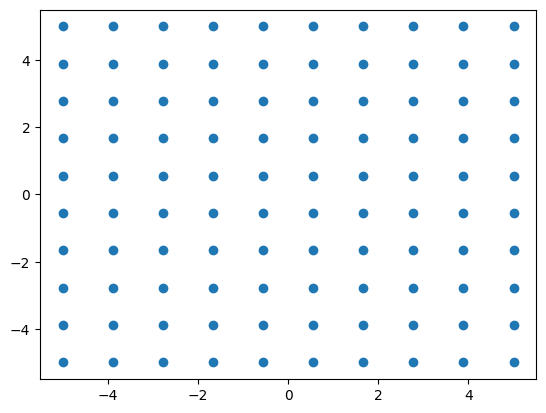

In [28]:
x = np.arange(-10, 10., 0.5)
y = f(x)
theta_0=np.linspace(-5,5,10)
theta_1=np.linspace(-5,5,10)

x1,x2=np.meshgrid(theta_0,theta_1)
plt.scatter(x1,x2)

9.0


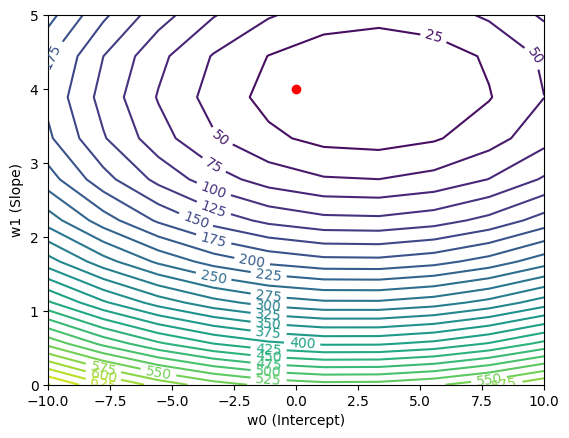

In [29]:
theta_0=np.linspace(-10,10,10)
theta_1=np.linspace(0,5,10)
t0, t1 = np.meshgrid(theta_0, theta_1)
Z = np.array([[mse_loss(t0, t1, x, y) for t0 in theta_0] for t1 in theta_1])


cp = plt.contour(t0, t1, Z,levels=30)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('w0 (Intercept)')
plt.ylabel('w1 (Slope)')

t_0,t_1=0,4
plt.scatter(t_0,t_1,c='red')
print(mse_loss(t_0, t_1, x, y))
plt.show()

9.0


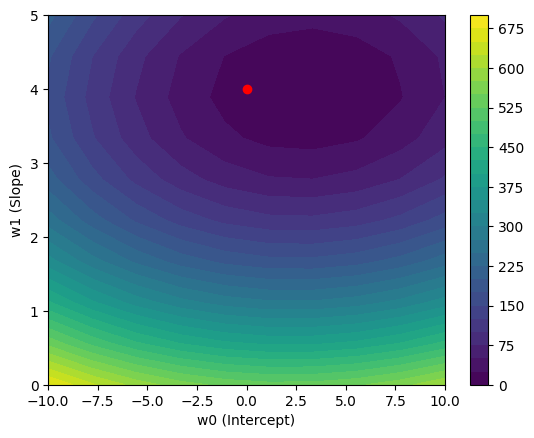

In [30]:

cp = plt.contourf(t0, t1, Z,levels=30)

plt.colorbar(cp)
plt.xlabel('w0 (Intercept)')
plt.ylabel('w1 (Slope)')

t_0,t_1=0,4
plt.scatter(t_0,t_1,c='red')
print(mse_loss(t_0, t_1, x, y))
plt.show()

In [36]:
def gradient_descent(f,df,x0,alpha=0.1,max_iter=50):
    x=x0
    history=[]
    for n in range(max_iter):
        g=df(x)
        fx=f(x)
        history.append({"iter": n, "x1": float(x[0]), "x2": float(x[1]), "f(x)": fx, "||grad||": float(np.linalg.norm(g))})
        x=x-alpha*g
    return history

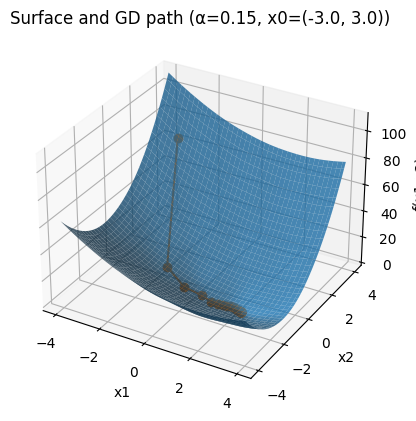

In [37]:
df_hist = pd.DataFrame(hist)

x1s = np.linspace(-4, 4, 120)
x2s = np.linspace(-4, 4, 120)
X1, X2 = np.meshgrid(x1s, x2s)
Z = (X1 - 2)**2 + 3*(X2 + 1)**2 + 0.3*np.sin(3*X1)*np.cos(2*X2)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, linewidth=0, antialiased=True, alpha=0.8)
# path on surface
path_x1 = df_hist["x1"].values
path_x2 = df_hist["x2"].values
path_z = np.array([f((a, b)) for a, b in zip(path_x1, path_x2)])
ax.plot(path_x1, path_x2, path_z, marker='o')
ax.set_title(f"Surface and GD path (α={alpha}, x0={tuple(x0)})")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("f(x1,x2)")
plt.show()


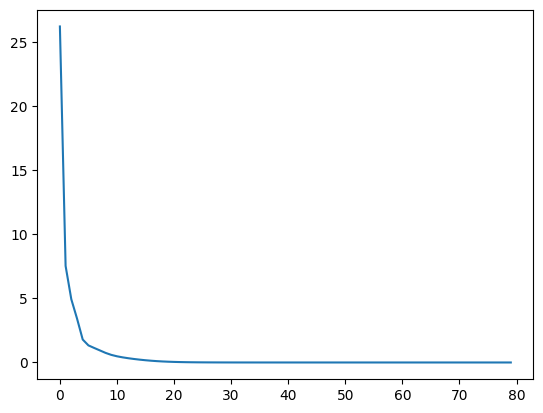

In [52]:
plt.plot(df_hist["iter"],df_hist["||grad||"])

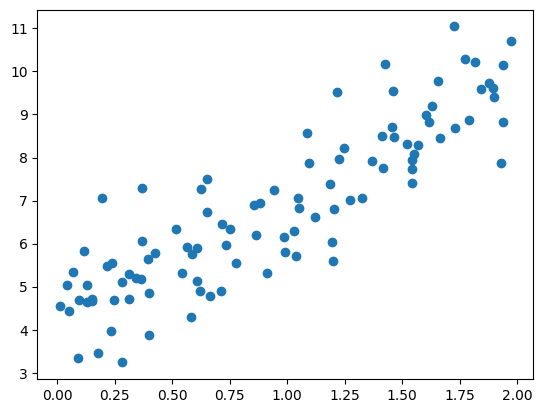

In [38]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.scatter(X,y)

[4.13191391] [2.84355879]


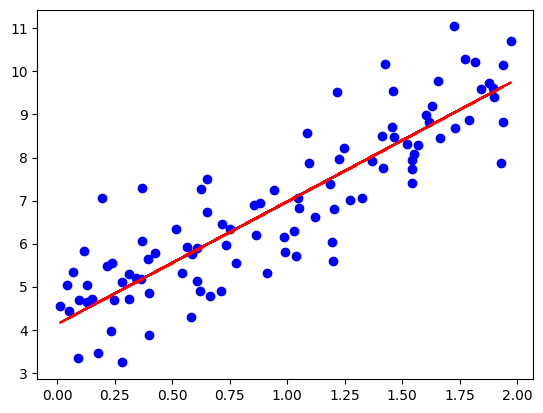

In [40]:
theta = np.random.randn(2, 1)  # [theta0, theta1]
alpha = 0.01                    # learning rate
iterations = 1000
n = len(X)

for _ in range(iterations):
    y_pred=theta[0]+theta[1]*X
    d_theta_0 = (2/n) * np.sum(y_pred-y)
    d_theta_1 = (2/n) * np.sum((y_pred-y) * X)
    theta[0] = theta[0] - alpha * d_theta_0
    theta[1] = theta[1] - alpha * d_theta_1

print(theta[0],theta[1])
plt.scatter(X, y, color='blue', label='Data')
y_pred = theta[0] + theta[1] * X
plt.plot(X, y_pred, color='red', label='pred')   
    

In [88]:
def GD(X,y,alpha=0.1,iter=1000):
    theta = np.random.randn(2, 1)
    n = len(X)
    for _ in range(iter):
        y_pred=theta[0]+theta[1]*X
        d_theta_0 = (2/n) * sum(y_pred-y)
        d_theta_1 = (2/n) * sum((y_pred-y) * X)
        theta[0] = theta[0] - alpha * d_theta_0
        theta[1] = theta[1] - alpha * d_theta_1
    return theta


In [89]:
theta= GD(X,y,alpha=0.01)
print(theta)

[[4.13191391]
 [2.84355879]]


In [43]:
def GD(X,y,alpha=0.1,iter=1000):
    theta = [-10.0,-10.0]
    trajectory = [(float(theta[0]),float(theta[1]))]
    n = len(X)
    for _ in range(iter):
        y_pred=theta[0]+theta[1]*X
        d_theta_0 = (2/n) * np.sum(y_pred-y)
        d_theta_1 = (2/n) * np.sum((y_pred-y) * X)
        theta[0] = theta[0] - alpha * d_theta_0
        theta[1] = theta[1] - alpha * d_theta_1
        trajectory.append((theta[0],theta[1]))
    return theta,trajectory

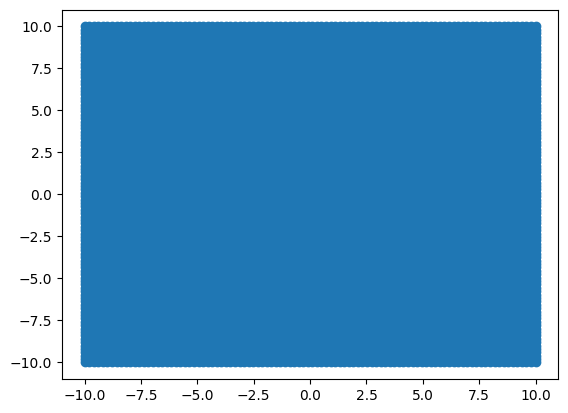

In [44]:
n_points = 5000
x = 2 * np.random.rand(n_points, 1).reshape(n_points)
y = 4 + 3 * x + np.random.randn(n_points, 1).reshape(n_points)

theta_0=np.linspace(-10,10,100)
theta_1=np.linspace(-10,10,100)
t0, t1 = np.meshgrid(theta_0, theta_1)
Z = np.array([[mse_loss(t0, t1, x, y) for t0 in theta_0] for t1 in theta_1])
plt.scatter(t0,t1)
plt.show()

In [47]:
theta,trajectory= GD(x,y,alpha=0.01,iter=10)
print(theta)

[-5.54692459896455, -4.8664798581308215]


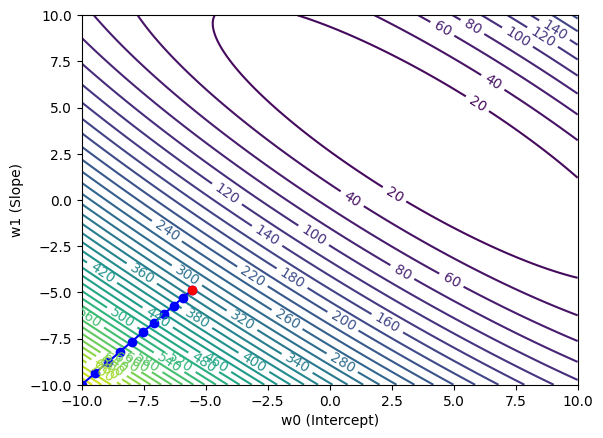

In [48]:
cp = plt.contour(t0, t1, Z,levels=50)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('w0 (Intercept)')
plt.ylabel('w1 (Slope)')
trajectory = np.array(trajectory)
plt.plot(trajectory[:, 0], trajectory[:, 1], 'bo-')
plt.scatter(trajectory[-1, 0], trajectory[-1, 1], color='red', zorder=5)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

In [49]:
def GD(X,y,alpha=0.1,iter=1000):
    l,n = X.shape       
    theta = np.random.randn(n, 1)
    for _ in range(iter):
        gradients = (2/l) * X.T.dot(X.dot(theta) - y)
        #gradients = (2/l) * X.T@ ((X@theta) - y)
        theta -= alpha * gradients
    return theta


In [50]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]
theta= GD(X_b,y,alpha=0.01)
print(theta)

[[4.15809376]
 [2.8204434 ]]


In [51]:
def GD(X,y,alpha=0.1,iter=1000):
    history=[]
    l,n = X.shape       
    theta = np.random.randn(n, 1)
    for i in range(iter):
        y_pred=X.dot(theta)
        mse=(1/l) * np.sum((y_pred - y)**2)
        gradients = (2/l) * X.T.dot(X.dot(theta) - y)       
        theta -= alpha * gradients
        history.append({"iter":i,"mse":mse,"theta":theta})
    return theta,history

In [52]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]
theta,history= GD(X_b,y,alpha=0.01)
df_hist = pd.DataFrame(history)


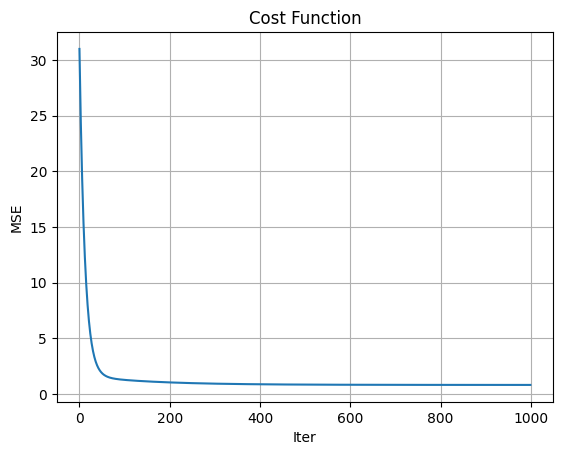

In [53]:
plt.plot(df_hist['iter'],df_hist['mse'])
plt.title("Cost Function")
plt.xlabel("Iter")
plt.ylabel("MSE")
plt.grid()
plt.show()

In [ ]:
np.linalg.norm()

In [54]:
def GD(X, y, alpha=0.1, iter=1000, mode="delta_theta", eps=1e-2):
    
    history=[]
    l,n = X.shape       
    theta = np.random.randn(n, 1)
    for i in range(iter):
        y_pred=X.dot(theta)
        mse=(1/l) * np.sum((y_pred - y)**2)
        gradients = (2/l) * X.T.dot(X.dot(theta) - y) 
        history.append({"iter":i,"mse":mse,"theta":theta})
    

        # критерии останова
        if mode == "grad_norm":
            grad_norm = np.linalg.norm(gradients)
            if grad_norm < eps:
                break
        elif mode == "delta_theta" and i > 0:
            delta = np.linalg.norm(theta - prev_theta)
            if delta < eps:                
                break

       
        prev_theta = theta.copy()
        theta = theta - alpha * gradients

    return theta, history

In [55]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]
theta,history= GD(X_b,y,alpha=0.01)
df_hist = pd.DataFrame(history)

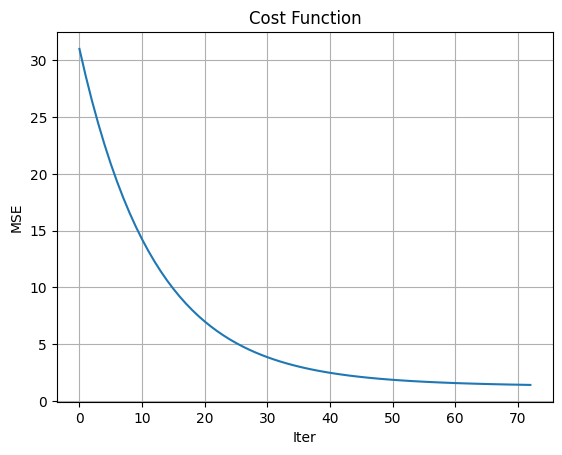

In [56]:
plt.plot(df_hist['iter'],df_hist['mse'])
plt.title("Cost Function")
plt.xlabel("Iter")
plt.ylabel("MSE")
plt.grid()
plt.show()

In [57]:
def plot_mse_contour_with_trajectory(X, y, history, w0_range=(-10,10), w1_range=(-10,10), num=200):
    y = y.reshape(-1, 1)
    l = len(y)

    theta0 = np.linspace(w0_range[0], w0_range[1], num)
    theta1 = np.linspace(w1_range[0], w1_range[1], num)
    T0, T1 = np.meshgrid(theta0, theta1)

    last_theta = history[-1]["theta"]  # shape (n,1)
    n = last_theta.shape[0]

    Z = np.zeros_like(T0, dtype=float)
    for i in range(num):
        for j in range(num):
            theta = last_theta.copy()
            theta[0, 0] = T0[i, j]
            theta[1, 0] = T1[i, j]
            y_pred = X @ theta
            Z[i, j] = (1.0 / l) * np.sum((y_pred - y) ** 2)

    cp = plt.contour(T0, T1, Z, levels=50)
    plt.clabel(cp, inline=1, fontsize=8)
    plt.xlabel('w0 (Intercept)')
    plt.ylabel('w1 (Slope)')

    traj = np.array([ (float(h["theta"][0,0]), float(h["theta"][1,0])) for h in history ])
    plt.plot(traj[:,0], traj[:,1], 'bo-', markersize=3)
    plt.scatter(traj[-1,0], traj[-1,1], c='red', zorder=5)

    plt.xlim(min(-10, traj[:,0].min()-1), max(10, traj[:,0].max()+1))
    plt.ylim(min(-10, traj[:,1].min()-1), max(10, traj[:,1].max()+1))
    plt.show()

In [58]:
def GD(X,y,iter=1000):
    history=[]
    l,n = X.shape       
    theta = np.random.randn(n, 1)
    for i in range(iter):
        alpha_t = 1.0 / (i + 1)
        y_pred=X.dot(theta)
        mse=(1/l) * np.sum((y_pred - y)**2)
        gradients = (2/l) * X.T.dot(X.dot(theta) - y)       
        theta -= alpha_t * gradients
        history.append({"iter":i,"mse":mse,"theta":theta.copy()})
    return theta,history

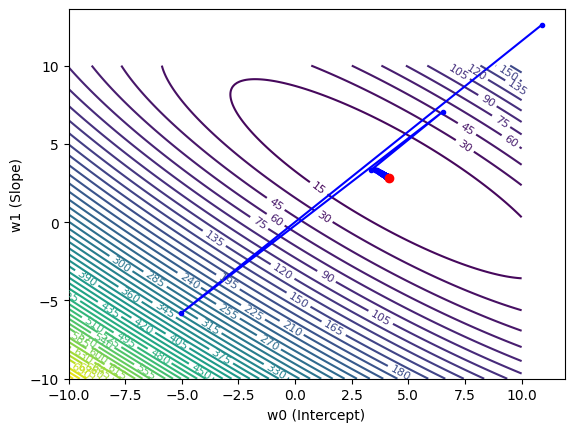

In [59]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]
theta, history = GD(X_b, y, iter=5000) 
plot_mse_contour_with_trajectory(X_b, y, history, w0_range=(-10,10), w1_range=(-10,10), num=200)

In [267]:
def GD(X,y,alpha=0.01,iter=1000):
    history=[]
    l,n = X.shape 
    theta = np.array([-10.0, -10.0]).reshape(-1,1)
   
    for i in range(iter):
        alpha_t = alpha / (i + 1)
        y_pred=X.dot(theta)
        mse=(1/l) * np.sum((y_pred - y)**2)
        gradients = (2/l) * X.T.dot(X.dot(theta) - y)       
        theta -= alpha_t * gradients
        history.append({"iter":i,"mse":mse,"theta":theta.copy()})
    return theta,history

2
[[-10.]
 [-10.]]


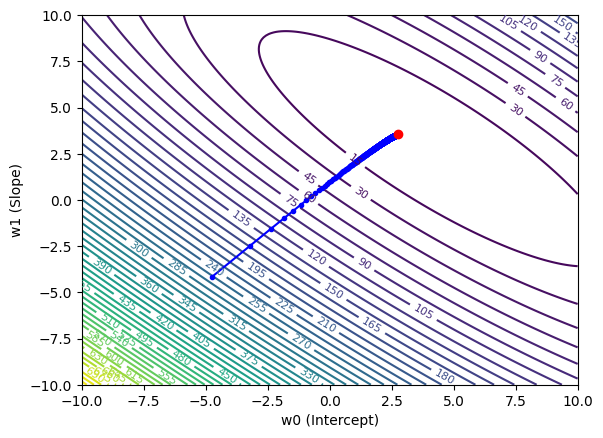

In [273]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]
theta, history = GD(X_b, y,alpha=0.1, iter=5000) 
plot_mse_contour_with_trajectory(X_b, y, history, w0_range=(-10,10), w1_range=(-10,10), num=200)

In [62]:
i=np.random.randint(0, 100)
i

96

In [63]:
def SGD(X,y,alpha=0.01,iter=1000):
    history=[]
    l,n = X.shape   
    theta = np.array([-10.0, -10.0]).reshape(-1,1)
    for k in range(iter):
        i=np.random.randint(0, len(y))
        x_i=X[i].reshape(1, -1)
        y_i=y[i]
        gradients = (2) * x_i.T.dot(x_i.dot(theta) - y_i)       
        theta -= alpha * gradients
        y_pred_full = X.dot(theta)
        mse = (1/l) * np.sum((y_pred_full - y)**2)
        history.append({"iter":k,"mse":mse,"theta":theta.copy()})
    return theta,history

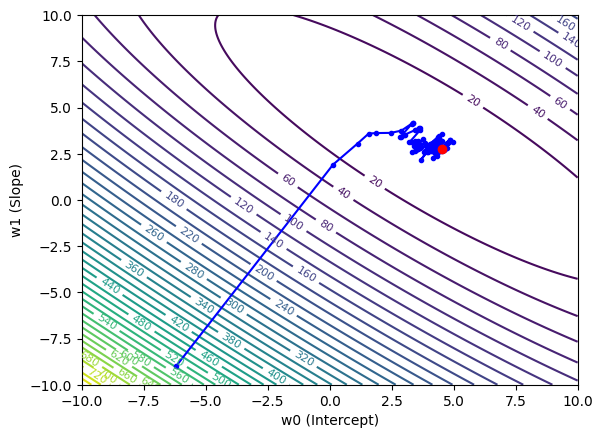

CPU times: total: 16 s
Wall time: 16.8 s


In [64]:
%%time
np.random.seed(42)
n_sample=5000
X = 2 * np.random.rand(n_sample, 1)
y = 4 + 3 * X + np.random.randn(n_sample, 1)
X_b = np.c_[np.ones((n_sample, 1)), X]
theta, history = SGD(X_b, y,alpha=0.1, iter=100) 
plot_mse_contour_with_trajectory(X_b, y, history, w0_range=(-10,10), w1_range=(-10,10), num=200)

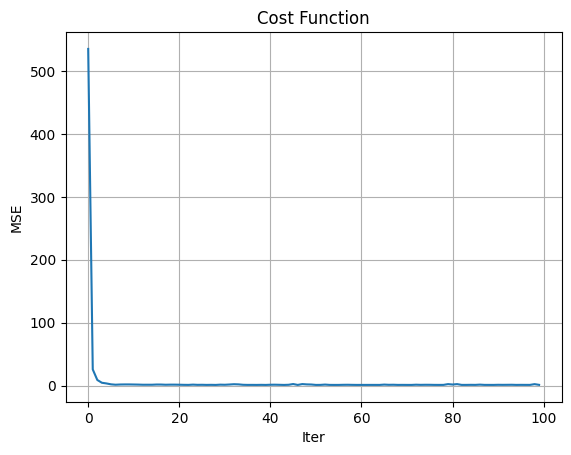

In [65]:
df_hist = pd.DataFrame(history)
plt.plot(df_hist['iter'],df_hist['mse'])
plt.title("Cost Function")
plt.xlabel("Iter")
plt.ylabel("MSE")
plt.grid()
plt.show()

In [66]:
def SGD_mini(X,y,alpha=0.01,iter=1000,batch_size=3):
    history=[]
    l,n = X.shape   
    theta = np.array([-10.0, -10.0]).reshape(-1,1)
    for k in range(iter):
        batch_indices = np.random.choice(len(y), size=batch_size, replace=False)
        x_batch = X[batch_indices,:]
        y_batch = y[batch_indices,:]

        gradients = (2/batch_size) * x_batch.T.dot(x_batch.dot(theta) - y_batch)       
        theta -= alpha * gradients
        y_pred_full = X.dot(theta)
        mse = (1/l) * np.sum((y_pred_full - y)**2)
        history.append({"iter":k,"mse":mse,"theta":theta.copy()})
    return theta,history

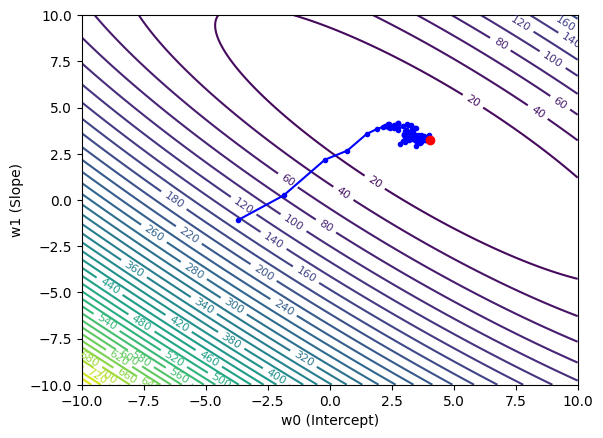

CPU times: total: 16.6 s
Wall time: 16.7 s


In [67]:
%%time
np.random.seed(42)
n_sample=5000
X = 2 * np.random.rand(n_sample, 1)
y = 4 + 3 * X + np.random.randn(n_sample, 1)
X_b = np.c_[np.ones((n_sample, 1)), X]
theta, history = SGD_mini(X_b, y,alpha=0.1, iter=100,batch_size=4) 
plot_mse_contour_with_trajectory(X_b, y, history, w0_range=(-10,10), w1_range=(-10,10), num=200)

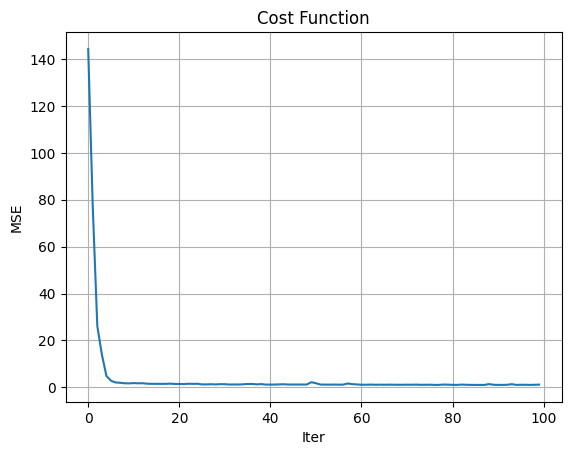

In [68]:
df_hist = pd.DataFrame(history)
plt.plot(df_hist['iter'],df_hist['mse'])
plt.title("Cost Function")
plt.xlabel("Iter")
plt.ylabel("MSE")
plt.grid()
plt.show()

In [69]:
def GD(X,y,alpha=0.1,iter=1000):    
    l,n = X.shape       
    theta = np.random.randn(n, 1)
    for i in range(iter):       
        gradients = (2/l) * X.T.dot(X.dot(theta) - y)       
        theta -= alpha * gradients        
    return theta

In [70]:
def SGD(X,y,alpha=0.01,iter=1000):    
    theta = np.array([-10.0, -10.0]).reshape(-1,1)
    for k in range(iter):
        i=np.random.randint(0, len(y))
        x_i=X[i].reshape(1, -1)
        y_i=y[i]
        gradients = (2) * x_i.T.dot(x_i.dot(theta) - y_i)       
        theta -= alpha * gradients        
    return theta

In [71]:
def SGD_mini(X,y,alpha=0.01,iter=1000,batch_size=3):    
    theta = np.array([-10.0, -10.0]).reshape(-1,1)
    for k in range(iter):
        batch_indices = np.random.choice(len(y), size=batch_size, replace=False)
        x_batch = X[batch_indices,:]
        y_batch = y[batch_indices,:]
        gradients = (2/batch_size) * x_batch.T.dot(x_batch.dot(theta) - y_batch)       
        theta -= alpha * gradients
        
    return theta

In [72]:
np.random.seed(42)
n_sample=5000
X = 2 * np.random.rand(n_sample, 1)
y = 4 + 3 * X + np.random.randn(n_sample, 1)
X_b = np.c_[np.ones((n_sample, 1)), X]

In [73]:
%%time
gradient_descent=GD(X_b,y,alpha=0.1,iter=300)
print(gradient_descent)

[[4.02849911]
 [2.95275409]]
CPU times: total: 188 ms
Wall time: 241 ms


In [74]:
%%time
gradient_descent_sgd=SGD(X_b,y,alpha=0.1,iter=300)
print(gradient_descent_sgd)

[[4.23773957]
 [2.54227795]]
CPU times: total: 0 ns
Wall time: 10.6 ms


In [75]:
%%time
gradient_descent_sgd_mini=SGD_mini(X_b,y,alpha=0.1,iter=300,batch_size=5)
print(gradient_descent_sgd_mini)

[[4.03834526]
 [2.88358371]]
CPU times: total: 78.1 ms
Wall time: 80.7 ms
